# Simple Linear Regression

Simple Linear Regression: It is a Regression Model that estimates the relationship between the independent variable and the dependent variable using a straight line [y = mx + c], where both the variables should be quantitative. The model with higher R-2 and less MSE is a good model fit.  

#### The steps involved are:
1. Importing the dataset.

2. Visualising the Data

3. Data Cleaning

4. Build the Model and Train it

5. Make Predictions on Unseen Data

In [33]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error

In [2]:
# Read data
salary_df= pd.read_csv('Salary_Data.csv')
salary_df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
salary_df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [6]:
salary_df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

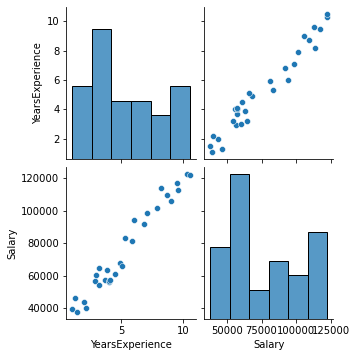

In [7]:
sns.pairplot(salary_df)

<AxesSubplot:xlabel='Salary'>

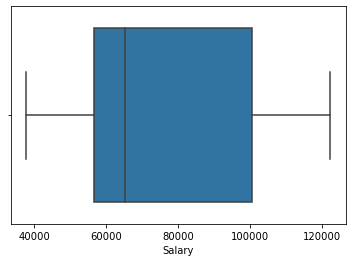

In [8]:
sns.boxplot(x=salary_df['Salary'])

<AxesSubplot:xlabel='Salary', ylabel='Count'>

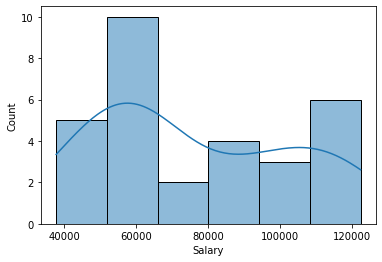

In [9]:
sns.histplot(data=salary_df.Salary,kde=True)

<AxesSubplot:xlabel='YearsExperience', ylabel='Count'>

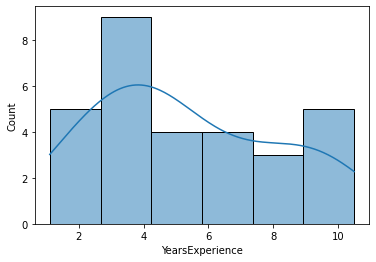

In [10]:
sns.histplot(data=salary_df.YearsExperience,kde=True)

<AxesSubplot:xlabel='YearsExperience'>

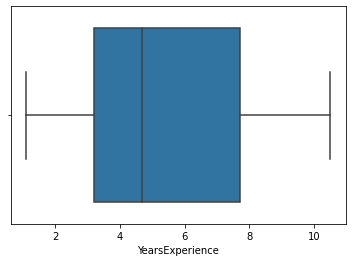

In [11]:
sns.boxplot(x=salary_df['YearsExperience'])

In [13]:
corre= salary_df.corr()
corre

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:>

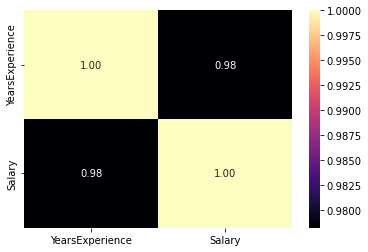

In [14]:
sns.heatmap(corre,cmap='magma',annot=True,fmt='.2f')

In [20]:
# Normalize dataset
salary_df_sc= (salary_df-np.min(salary_df))/(np.max(salary_df)-np.min(salary_df))
salary_df_sc

,YearsExperience,Salary
0,0.000000,0.019041
1,0.021277,0.100094
2,0.042553,0.000000
3,0.095745,0.068438
4,0.117021,0.025514
5,0.191489,0.223376
6,0.202128,0.264812
7,0.223404,0.197425
8,0.223404,0.315545
9,0.276596,0.229837


In [21]:
model= smf.ols('Salary~YearsExperience',data=salary_df_sc).fit()
model.summary()    

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 11 Jan 2022   Prob (F-statistic):           1.14e-20
Time:                        13:08:16   Log-Likelihood:                 38.951
No. Observations:                  30   AIC:                            -73.90
Df Residuals:                      28   BIC:                            -71.10
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.0182      0.023     -0.807      0.427      -0.065       0.028
YearsExperience     1.0493      0.042     24.950      0.000       0.963       1.135
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         4.10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
model.params

Intercept         -0.018236
YearsExperience    1.049252
dtype: float64

In [23]:
model.resid

0     0.037277
1     0.096006
2    -0.026413
3    -0.013786
4    -0.079035
5     0.040691
6     0.070965
7    -0.018747
8     0.099373
9    -0.042146
10    0.006744
11   -0.092110
12   -0.078373
13   -0.088070
14   -0.085117
15   -0.049126
16   -0.094000
17    0.085176
18   -0.002173
19    0.135224
20    0.019916
21    0.063620
22    0.010100
23    0.124381
24    0.016822
25   -0.062129
26    0.016562
27   -0.045793
28   -0.008691
29   -0.037146
dtype: float64

In [24]:
model.resid_pearson

array([ 0.54520896,  1.40418217, -0.38632031, -0.20163464, -1.15596979,
        0.59514885,  1.03793812, -0.27418681,  1.45343166, -0.61642477,
        0.09863781, -1.34720543, -1.1462834 , -1.28812023, -1.24492716,
       -0.71851921, -1.37484017,  1.24578559, -0.03178436,  1.9777821 ,
        0.29128615,  0.93050694,  0.14772822,  1.81920104,  0.24603492,
       -0.90870332,  0.24223936, -0.66976978, -0.12712026, -0.54330225])

In [25]:
model.conf_int(0.05)

,0,1
Intercept,-0.064547,0.028075
YearsExperience,0.963108,1.135395


In [28]:
#making prediction
pred= model.predict(salary_df)
pred

0      1.135941
1      1.345791
2      1.555642
3      2.080268
4      2.290118
5      3.024594
6      3.129519
7      3.339370
8      3.339370
9      3.863995
10     4.073846
11     4.178771
12     4.178771
13     4.283696
14     4.703397
15     5.123097
16     5.332948
17     5.542798
18     6.172349
19     6.277274
20     7.116676
21     7.431451
22     8.270852
23     8.585628
24     9.110254
25     9.425029
26     9.949655
27    10.054580
28    10.789056
29    10.998907
dtype: float64

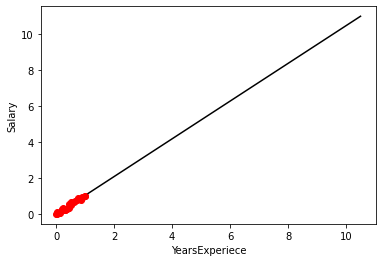

In [30]:
plt.scatter(x=salary_df_sc.YearsExperience,y=salary_df_sc.Salary,color='red')
plt.plot(salary_df.YearsExperience,pred,color='black')
plt.xlabel('YearsExperiece')
plt.ylabel('Salary')
plt.show()

In [42]:
rmse1=np.sqrt(mean_squared_error(salary_df.Salary, pred))
rmse1

80634.70877587497

In [37]:
#By log Prediction
model2= smf.ols('Salary~np.log(YearsExperience)',data=salary_df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Tue, 11 Jan 2022   Prob (F-statistic):           3.25e-13
Time:                        13:29:35   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(YearsExperience)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
model2.params

Intercept                  14927.97177
np.log(YearsExperience)    40581.98796
dtype: float64

In [48]:
pred2= model2.predict(pd.DataFrame(salary_df.YearsExperience))

In [49]:
rmse_log= np.sqrt(mean_squared_error(salary_df.Salary, pred2))
rmse_log

10302.893706228308

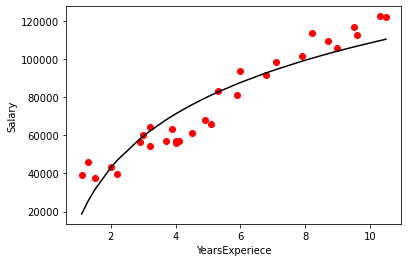

In [43]:
plt.scatter(x=salary_df.YearsExperience,y=salary_df.Salary,color='red')
plt.plot(salary_df.YearsExperience,pred2,color='black')
plt.xlabel('YearsExperiece')
plt.ylabel('Salary')
plt.show()

In [44]:
# log of dependent variables
model3= smf.ols('np.log(Salary)~YearsExperience',data=salary_df).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Tue, 11 Jan 2022   Prob (F-statistic):           7.03e-18
Time:                        13:40:53   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.5074      0.038    273.327      0.000      10.429      10.586
YearsExperience     0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
model3.params

Intercept          10.507402
YearsExperience     0.125453
dtype: float64

In [46]:
pred3= model3.predict(pd.DataFrame(salary_df.YearsExperience))

In [52]:
pred_3=np.exp(pred3)  # as we have used log(AT) in preparing model so we need to convert it back
pred_3

0      41998.957468
1      43066.066794
2      44160.289228
3      47019.029189
4      48213.688474
5      52639.142472
6      53303.675386
7      54658.014935
8      54658.014935
9      58196.330788
10     59674.982903
11     60428.338456
12     60428.338456
13     61191.204604
14     64340.199291
15     67651.246149
16     69370.128712
17     71132.684635
18     76693.630780
19     77661.835040
20     85860.704208
21     89153.725393
22     98565.809591
23    102346.110512
24    108971.540758
25    113150.933364
26    120475.819601
27    121996.743836
28    133194.621344
29    136578.829694
dtype: float64

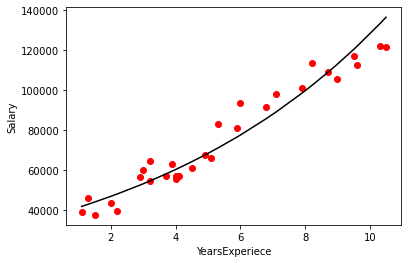

In [54]:
plt.scatter(x=salary_df.YearsExperience,y=salary_df.Salary,color='red')
plt.plot(salary_df.YearsExperience,pred_3,color='black')
plt.xlabel('YearsExperiece')
plt.ylabel('Salary')
plt.show()

In [53]:
rmse_log2= np.sqrt(mean_squared_error(salary_df.Salary, pred_3))
rmse_log2

7213.235076620129

In [55]:
salary_resid=model3.resid_pearson
salary_resid

array([-0.66732261,  0.71866312, -1.60729238, -0.78878267, -1.9356925 ,
        0.74867647,  1.23436001, -0.0398886 ,  1.68260228, -0.17836411,
        0.58917114, -0.81508595, -0.60434465, -0.71028167, -0.52600626,
        0.04320755, -0.50424366,  1.58695853,  0.60373565,  1.94386552,
        0.6763497 ,  0.99482518,  0.27970841,  1.0847233 ,  0.04297985,
       -0.70724335, -0.30175692, -0.81559685, -0.86410542, -1.1638191 ])

Text(0, 0.5, 'Standardized Residual')

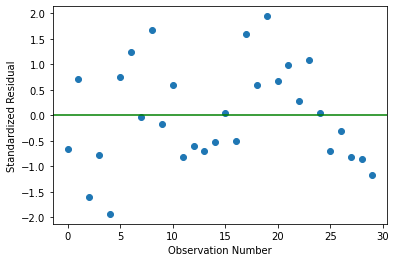

In [56]:
plt.plot(model3.resid_pearson,'o')
plt.axhline(y=0,color='green')
plt.xlabel("Observation Number")
plt.ylabel("Standardized Residual")

Text(0, 0.5, 'Actual')

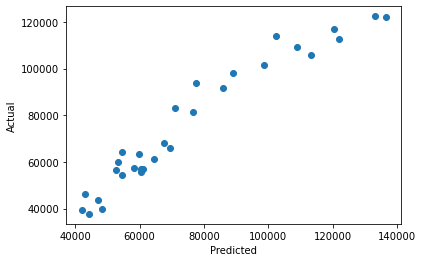

In [57]:
plt.scatter(x=pred_3,y=salary_df.Salary)
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [58]:
salary_df['YearsExperience_sq']=salary_df.YearsExperience*salary_df.YearsExperience
salary_df

,YearsExperience,Salary,YearsExperience_sq
0,1.1,39343.0,1.21
1,1.3,46205.0,1.69
2,1.5,37731.0,2.25
3,2.0,43525.0,4.00
4,2.2,39891.0,4.84
5,2.9,56642.0,8.41
6,3.0,60150.0,9.00
7,3.2,54445.0,10.24
8,3.2,64445.0,10.24
9,3.7,57189.0,13.69


In [59]:
model4= smf.ols('np.log(Salary)~YearsExperience+YearsExperience_sq',data=salary_df).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     249.2
Date:                Tue, 11 Jan 2022   Prob (F-statistic):           3.95e-18
Time:                        13:56:48   Log-Likelihood:                 32.391
No. Observations:                  30   AIC:                            -58.78
Df Residuals:                      27   BIC:                            -54.58
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             10.3369      0.067    154.368      0.000      10.199      10.474
YearsExperience        0.2024      0.027      7.601      0.000       0.148       0.257
YearsExperience_sq    -0.0066      0.002     -2.957      0.006      -0.011      -0.002
==============================================================================
Omnibus:                        1.099   Durbin-Watson:                   1.845
Prob(Omnibus):                  0.577   Jarque-Bera (JB):                1.002
Skew:                           0.260   Prob(JB):                        0.606
Kurtosis:                       2.271   Cond. No.                         223.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
model4.params

Intercept             10.336852
YearsExperience        0.202382
YearsExperience_sq    -0.006614
dtype: float64

In [61]:
pred_quad = model4.predict(salary_df)

In [62]:
pred4=np.exp(pred_quad)  # as we have used log(AT) in preparing model so we need to convert it back
pred4

0      38233.559684
1      39686.674746
2      41173.227466
3      45033.440973
4      46633.832589
5      52477.426306
6      53341.747319
7      55091.465477
8      55091.465477
9      59582.917523
10     61423.509899
11     62352.647026
12     62352.647026
13     63287.467325
14     67080.231957
15     70949.981000
16     72909.896294
17     74884.321575
18     80877.084894
19     81883.588147
20     89970.445587
21     93001.652359
22    101003.996109
23    103952.199275
24    108770.218622
25    111590.303652
26    116146.198447
27    117033.009807
28    122976.902760
29    124581.554019
dtype: float64

In [63]:
rmse_quad = np.sqrt(mean_squared_error(salary_df.Salary, pred4))
rmse_quad 

5391.081582693624

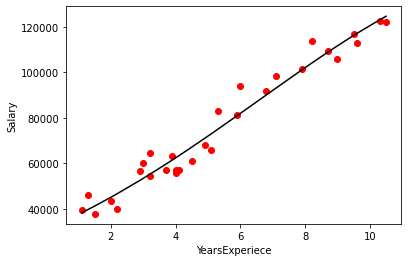

In [64]:
plt.scatter(x=salary_df.YearsExperience,y=salary_df.Salary,color='red')
plt.plot(salary_df.YearsExperience,pred4,color='black')
plt.xlabel('YearsExperiece')
plt.ylabel('Salary')
plt.show()

Text(0, 0.5, 'Standardized Residual')

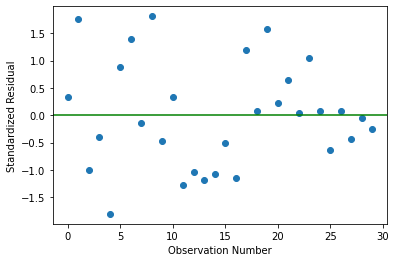

In [65]:
plt.plot(model4.resid_pearson,'o')
plt.axhline(y=0,color='green')
plt.xlabel("Observation Number")
plt.ylabel("Standardized Residual")

Text(0, 0.5, 'Actual')

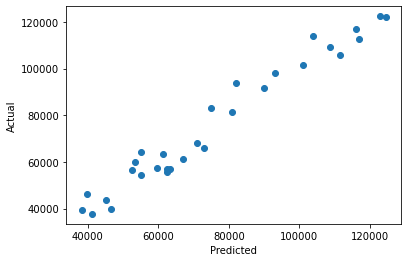

In [66]:
plt.scatter(x=pred4,y=salary_df.Salary)
plt.xlabel("Predicted")
plt.ylabel("Actual")

(array([1., 3., 3., 5., 3., 7., 1., 2., 2., 3.]),
 array([-1.80253896, -1.44129045, -1.08004195, -0.71879344, -0.35754493,
         0.00370357,  0.36495208,  0.72620059,  1.08744909,  1.4486976 ,
         1.8099461 ]),
 <BarContainer object of 10 artists>)

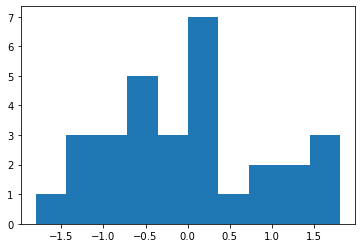

In [67]:
plt.hist(model4.resid_pearson)

In [68]:
data = {"MODEL":pd.Series(["rmse1","rmse_log","rmse_log2","rmse_quad"]),
        "RMSE_Values":pd.Series([rmse1,rmse_log,rmse_log2,rmse_quad]),
        "Rsquare":pd.Series([model.rsquared,model2.rsquared,model3.rsquared,model4.rsquared])}
table=pd.DataFrame(data)
table

,MODEL,RMSE_Values,Rsquare
0,rmse1,80634.708776,0.956957
1,rmse_log,10302.893706,0.853889
2,rmse_log2,7213.235077,0.931967
3,rmse_quad,5391.081583,0.948611


Model RMSE value is very less and Rsquare value is 94% so the best fit model is model4  